## Binary logistic regression

Written by Jess Breda June 2023

In [1]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

Steps
-----
1. generate the dataset
2. Define cost & gradient fx
3. Initialize weights & run optimization
4. Visualize

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# -- PLOT FUNCTIONS -- #
def generate_sigmoids(true_W, optimized_W):
    # create a matrix X with bias column to pass
    # to the sigmoid function
    x_range = np.linspace(-10, 10, 100)
    n_features = len(true_W) - 1
    X_with_bias = np.tile(x_range, (n_features, 1)).T
    X_with_bias = np.c_[np.ones_like(x_range), X_with_bias] # add bias column

    true_logits = X_with_bias @ true_W
    true_probabilities = sigmoid(true_logits)

    optimized_logits = X_with_bias @ optimized_W
    optimized_probabilities = sigmoid(optimized_logits)

    return  x_range, true_probabilities, optimized_probabilities

def plot_sigmoids(x_range, true_probabilities, optimized_probabilities):
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.plot(x_range, true_probabilities, label='true', color="gray")
    ax.plot(x_range, optimized_probabilities, label='optimized', color="gray", linestyle="--")
    ax.legend()
    ax.set(title="Sigmoid Functions", xlabel="Logits", ylabel="Probability")

def plot_weights(true_W, optimized_W):
    fig,ax = plt.subplots(figsize=(6,4))

    feature_and_bias_labels = np.arange(len(true_W))

    ax.plot(feature_and_bias_labels, true_W, label='true', color="gray", marker='o')
    ax.plot(feature_and_bias_labels, optimized_W, label='optimized', color="gray", marker='o', linestyle='dashed')

    # Set the x-axis tick labels
    _ = ax.set_xticks(feature_and_bias_labels)
    ax.set(xlabel='Feature', ylabel='Weight', title="Recovered Weights")
    ax.legend()



### 1. Generate Data

In [3]:

N = 100000  # Number of samples
D = 2  # Number of features

# Generate random feature values
X = np.random.rand(N, D)

# Generate random true weights (including the bias coefficient)
true_W = np.random.rand(D+1)

# Add bias column to the dataset
X_with_bias = np.c_[np.ones(N), X]

# Generate target labels using logistic function
logits = X_with_bias @ true_W
probabilities = sigmoid(logits)
y = np.random.binomial(1, probabilities)


### 2. Define cost & gradient functions

These are passed into scipys' `minimize` function and require the global variables `X_with_bias` and `y` to be defined. Not ideal long term, but it works for now. `X` includes a first bias column of 1s and $\sigma(x) = \frac{1}{1 + exp(-x)}$

1. Logistic Regression Cost Function:

$$ \text{{logits}} = X \cdot W $$
$$ \text{{p(y|x, W)}} = \sigma(\text{{logits}}) $$
$$ \text{{nll}} = \frac{1}{n} \sum_{i=1} ^{n}(y \cdot \log(\text{{p(y|x, W)}}) + (1 - y) \cdot \log(1 - \text{{p(y|x, W)}})) $$

2. Logistic Regression Gradient Function:

$$ \text{{logits}} = X \cdot W $$
$$ \text{{p(y|x, W)}} = \sigma(\text{{logits}}) $$
$$\nabla \text{nll}_W = \frac{{X^T \cdot (\text{{p(y|x, W)}} - y)}}{N}$$

In [4]:
def logistic_regression_cost(W):
    """Cost function for logistic regression using negative log-likelihood"""
    logits = X_with_bias @ W
    probabilities = sigmoid(logits)
    nll = -np.mean(y * np.log(probabilities) + (1 - y) * np.log(1 - probabilities))
    return nll

def logistic_regression_gradient(W):
    """Gradient of the cost function for logistic regression using negative log-likelihood"""
    logits = X_with_bias @ W
    probabilities = sigmoid(logits)
    gradient = np.dot(X_with_bias.T, (probabilities - y)) / N
    return gradient
a

### 3. Initialize Weights & Optimize

In [5]:

initial_W = np.zeros(D+1)  # Initial guess for weights

# optimize using L-BFGS-B algorithm
# NOTE this uses the global variables X_with_bias and y!
result = minimize(logistic_regression_cost, initial_W, method='L-BFGS-B', jac=logistic_regression_gradient)
optimized_W = result.x


In [6]:
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])

print("True weights:", true_W)
print("Optimized weights:", optimized_W)


Status : CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
Total Evaluations: 10
True weights: [0.24256925 0.14212125 0.35262433]
Optimized weights: [0.24642583 0.12096556 0.36064974]


### 5. Visualize the results

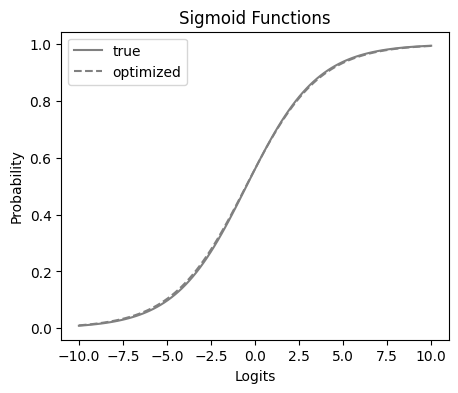

In [7]:
x_range, true_sig, optimized_sig = generate_sigmoids(true_W, optimized_W)
plot_sigmoids(x_range, true_sig, optimized_sig)

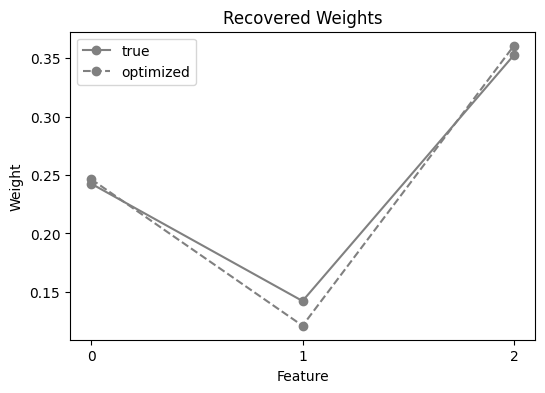

In [8]:
plot_weights(true_W, optimized_W)